In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

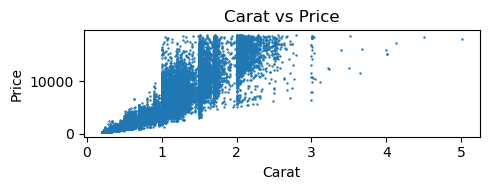

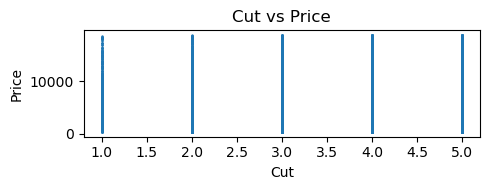

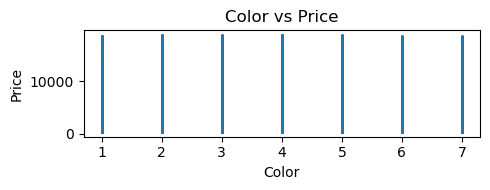

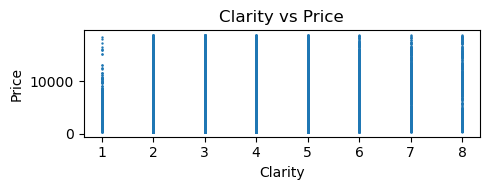

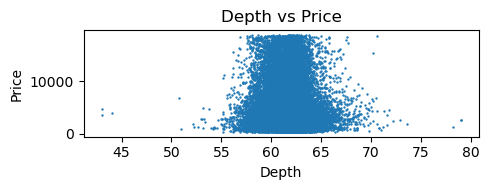

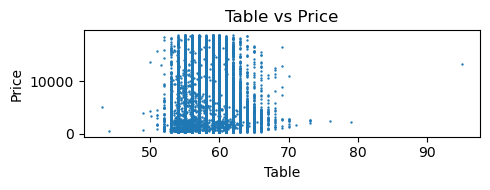

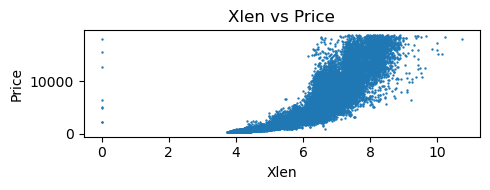

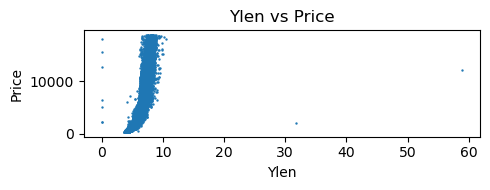

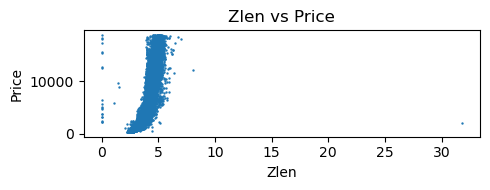

In [2]:

points = np.genfromtxt('diamonds.csv', delimiter=',')[1:]

column_names = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'xlen', 'ylen', 'zlen']

for i, name in enumerate(column_names):
    if name != 'price':
        x = points[:, i]
        y = points[:, 6] 
        plt.figure(figsize=(5, 2))
        plt.scatter(x, y, s=0.5)
        plt.xlabel(name.capitalize())
        plt.ylabel('Price')
        plt.title(f'{name.capitalize()} vs Price')
        plt.tight_layout()
        plt.show()


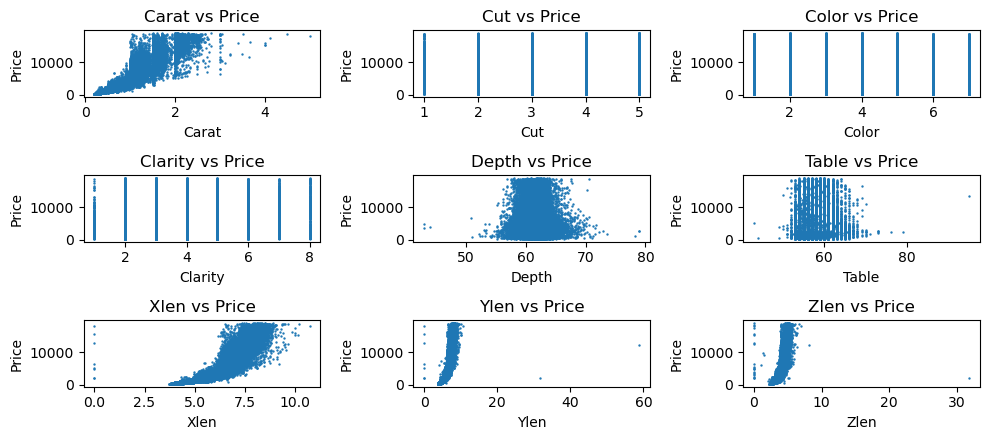

In [3]:

price_index = column_names.index('price')
y = points[:, price_index]
x_columns = [i for i in range(len(column_names)) if i != price_index]
x_names = [column_names[i] for i in x_columns]

num_cols = 3
num_rows = int(np.ceil(len(x_columns) / num_cols))

plt.figure(figsize=(10, 1.5 * num_rows))

for idx, (col_idx, name) in enumerate(zip(x_columns, x_names)):
    x = points[:, col_idx]
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.scatter(x, y, s=0.5)
    plt.xlabel(name.capitalize())
    plt.ylabel('Price')
    plt.title(f'{name.capitalize()} vs Price')

plt.tight_layout()
plt.show()

1) **Most Suitable Columns for Linear/Polynomial Relationship with Price:**

    Carat, Depth, X (length), Y (width), Z (depth), Table are more suitable for establishing a regression relationship with price.

    Carat:
    This feature shows a strong and direct relationship with price. It increases sharply, almost exponentially, as carat increases. So while a linear model might work to some extent, a polynomial or exponential model would likely perform better. The choice depends on the desired accuracy and how well the output fits different degrees of polynomial equations.

    Depth:
    The relationship seems to be parabolic in nature, so a polynomial regression  may yield better results.

    X, Y, Z (dimensions):
    These behave similarly to carat. As the values increase, the price increases rapidly. The steep change suggests a polynomial or exponential relationship, making them suitable for such regression models.

    Table:
    The relationship is not as direct or consistent. There might be some linear pattern, but it’s not very strong. So, while linear regression may be applied, its effectiveness would be limited.

2. **Explain why some plots are appearing as vertical or horizontal lines?**

These are categorical features represented by discrete numerical values. For example, Cut has only five distinct classes. Since they represent categories, applying a linear or polynomial model directly to their encoded values may lead to misleading results.

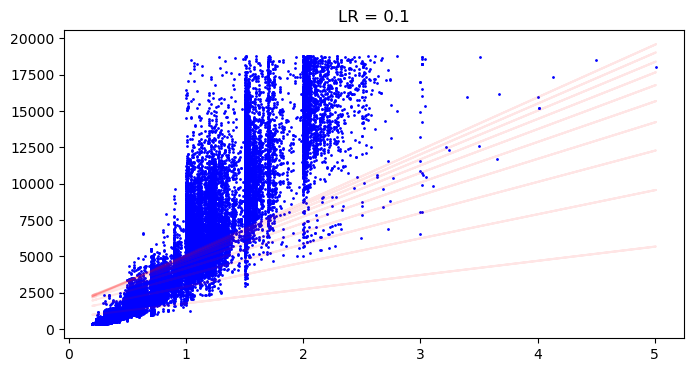

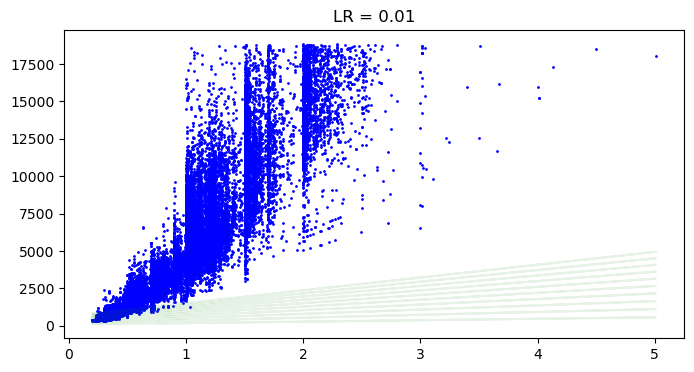

In [4]:

x = points[:, 0]
for learning_rate, color, num_iterations in zip([0.1, 0.01], ['r', 'g'], [10, 10]):

    b = 0
    m = 0
    plt.figure(figsize=(8,4))
    plt.scatter(x, y, s=1, c='b')
    plt.title(f'LR = {learning_rate}')
    for i in range(num_iterations):
        i = i+1
        m_gradient = 0
        b_gradient = 0
        N = float(len(points))
        for j in range(0, len(points)):
            m_gradient += (2/N) * x[j] * (y[j] - (m * x[j] + b))
            b_gradient += (2/N) * (y[j] - (m * x[j] + b))

        m = m + learning_rate * m_gradient
        b = b + learning_rate * b_gradient
        pred = m * x + b
        plt.plot(x, pred, c=color, alpha=0.1)
plt.show()

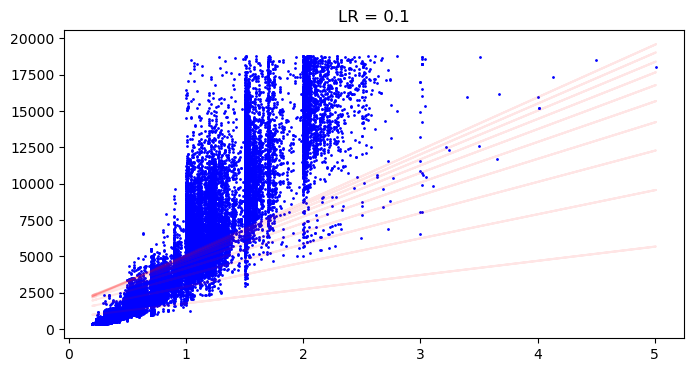

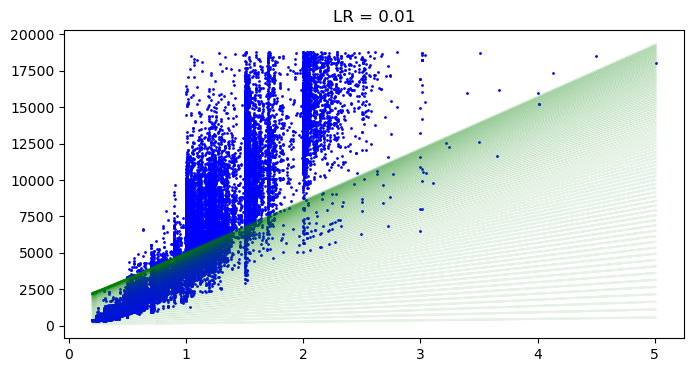

In [5]:

x = points[:, 0]
for learning_rate, color, num_iterations in zip([0.1, 0.01], ['r', 'g'], [10, 100]):

    b = 0
    m = 0
    plt.figure(figsize=(8,4))
    plt.scatter(x, y, s=1, c='b')
    plt.title(f'LR = {learning_rate}')
    for i in range(num_iterations):
        i = i+1
        m_gradient = 0
        b_gradient = 0
        N = float(len(points))
        for j in range(0, len(points)):
            m_gradient += (2/N) * x[j] * (y[j] - (m * x[j] + b))
            b_gradient += (2/N) * (y[j] - (m * x[j] + b))

        m = m + learning_rate * m_gradient
        b = b + learning_rate * b_gradient
        pred = m * x + b
        plt.plot(x, pred, c=color, alpha=0.1)
plt.show()

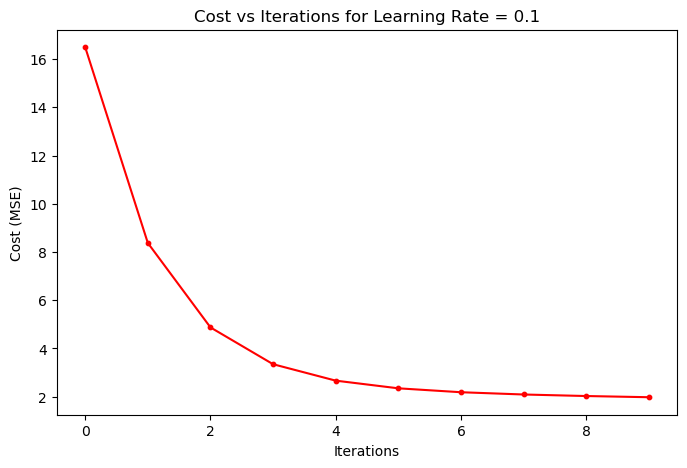

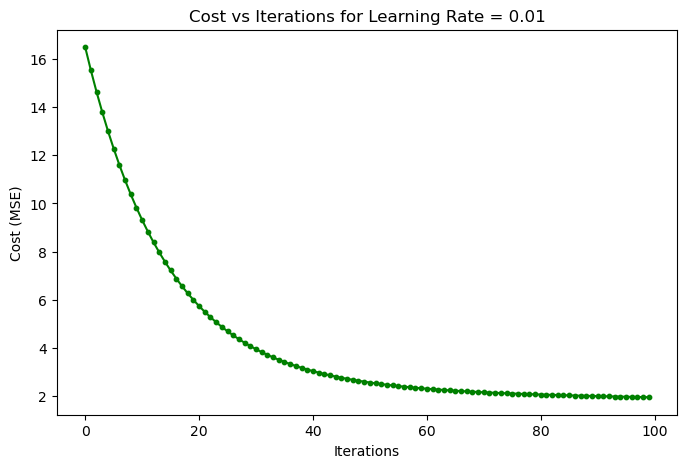

In [6]:

cost_0_1 = []
b_0_1 = 0
m_0_1 = 0

# For LR = 0.1
for i in range(10):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m_0_1 * x_j + b_0_1))
        b_gradient += (2/N) * (y_j - (m_0_1 * x_j + b_0_1))
        total_cost += (y_j - (m_0_1 * x_j + b_0_1)) ** 2
    
    cost_0_1.append(total_cost/N)
    
    m_0_1 = m_0_1 + 0.1 * m_gradient
    b_0_1 = b_0_1 + 0.1 * b_gradient

plt.figure(figsize=(8, 5))
plt.plot(range(10), cost_0_1, 'r-', label='LR=0.1') 
plt.scatter(range(10), cost_0_1, color='r', s=10, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.1')
plt.show()

# Reset parameters for LR = 0.01
cost_0_01 = []
b_0_01 = 0
m_0_01 = 0

for i in range(100):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m_0_01 * x_j + b_0_01))
        b_gradient += (2/N) * (y_j - (m_0_01 * x_j + b_0_01))
        total_cost += (y_j - (m_0_01 * x_j + b_0_01)) ** 2
    
    cost_0_01.append(total_cost/N)
    
    m_0_01 = m_0_01 + 0.01 * m_gradient
    b_0_01 = b_0_01 + 0.01 * b_gradient

# Plot cost vs iterations for LR=0.01
plt.figure(figsize=(8, 5))
plt.plot(range(100), cost_0_01, 'g-')
plt.scatter(range(100), cost_0_01, color='g', s=10, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.01')
plt.show()

LR=0.1 - Minimum cost: 1.9798318842272402 at iteration 10


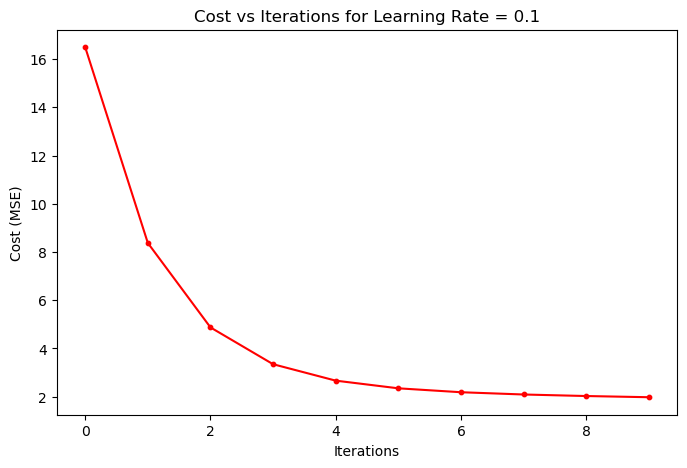

LR=0.01 - Minimum cost: 1.9560095827360935 at iteration 100


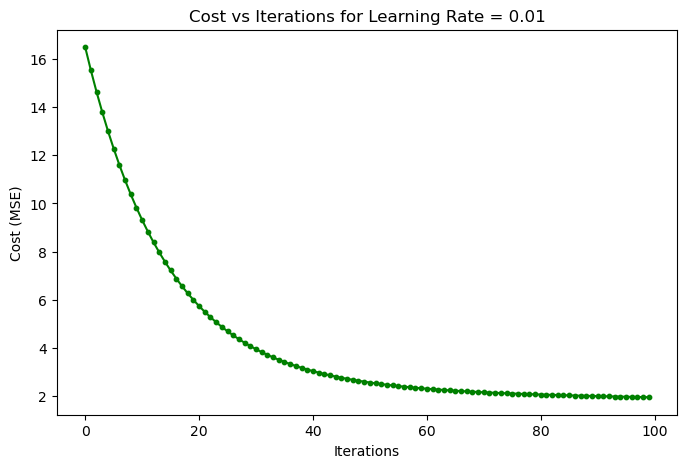

In [7]:
cost_0_1 = []
b_0_1 = 0
m_0_1 = 0

# For LR = 0.1
for i in range(10):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m_0_1 * x_j + b_0_1))
        b_gradient += (2/N) * (y_j - (m_0_1 * x_j + b_0_1))
        total_cost += (y_j - (m_0_1 * x_j + b_0_1)) ** 2
    
    cost_0_1.append(total_cost/N)
    
    m_0_1 = m_0_1 + 0.1 * m_gradient
    b_0_1 = b_0_1 + 0.1 * b_gradient

# Print minimum cost for LR=0.1
min_cost_0_1 = min(cost_0_1)
min_index_0_1 = cost_0_1.index(min_cost_0_1)
print(f"LR=0.1 - Minimum cost: {min_cost_0_1} at iteration {min_index_0_1+1}")

plt.figure(figsize=(8, 5))
plt.plot(range(10), cost_0_1, 'r-', label='LR=0.1')
plt.scatter(range(10), cost_0_1, color='r', s=10, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.1')
plt.show()

# Reset parameters for LR = 0.01
cost_0_01 = []
b_0_01 = 0
m_0_01 = 0

for i in range(100):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m_0_01 * x_j + b_0_01))
        b_gradient += (2/N) * (y_j - (m_0_01 * x_j + b_0_01))
        total_cost += (y_j - (m_0_01 * x_j + b_0_01)) ** 2
    
    cost_0_01.append(total_cost/N)
    
    m_0_01 = m_0_01 + 0.01 * m_gradient
    b_0_01 = b_0_01 + 0.01 * b_gradient

# Print minimum cost for LR=0.01
min_cost_0_01 = min(cost_0_01)
min_index_0_01 = cost_0_01.index(min_cost_0_01)
print(f"LR=0.01 - Minimum cost: {min_cost_0_01} at iteration {min_index_0_01+1}")

plt.figure(figsize=(8, 5))
plt.plot(range(100), cost_0_01, 'g-')
plt.scatter(range(100), cost_0_01, color='g', s=10, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.01')
plt.show()

LR=0.001 - Minimum cost: 1.9537225843662673 at iteration 1000
LR=0.001 - Final parameters: m=1.3529986293476137, b=2.505301918860723


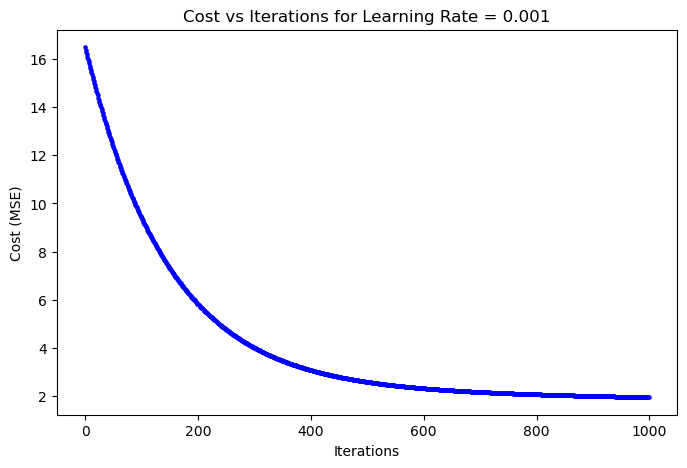

In [8]:
# LR = 0.001
cost_0_001 = []
b_0_001 = 0
m_0_001 = 0

# 1000 iterations
for i in range(1000):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        m_gradient += (2/N) * x_j * (y_j - (m_0_001 * x_j + b_0_001))
        b_gradient += (2/N) * (y_j - (m_0_001 * x_j + b_0_001))
        total_cost += (y_j - (m_0_001 * x_j + b_0_001)) ** 2
    
    cost_0_001.append(total_cost/N)
    
    m_0_001 = m_0_001 + 0.001 * m_gradient
    b_0_001 = b_0_001 + 0.001 * b_gradient


min_cost_0_001 = min(cost_0_001)
min_index_0_001 = cost_0_001.index(min_cost_0_001)
print(f"LR=0.001 - Minimum cost: {min_cost_0_001} at iteration {min_index_0_001+1}")


print(f"LR=0.001 - Final parameters: m={m_0_001}, b={b_0_001}")

plt.figure(figsize=(8, 5))
plt.plot(range(1000), cost_0_001, 'b-')
plt.scatter(range(1000), cost_0_001, color='b', s=5, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.001')
plt.show()

/home/tazmeen/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


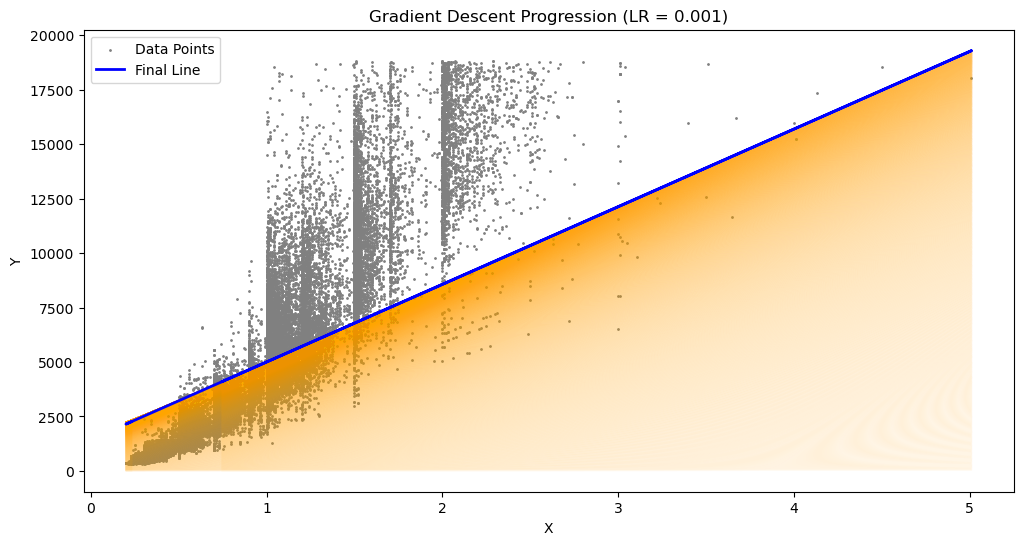

In [9]:
x = points[:, 0]
y = points[:, price_index]

learning_rate = 0.001
num_iterations = 1000

b = 0
m = 0
N = float(len(points))


plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=1, c='gray', label='Data Points')
plt.title(f'Gradient Descent Progression (LR = {learning_rate})')
plt.xlabel("X")
plt.ylabel("Y")

for i in range(num_iterations):
    m_gradient = 0
    b_gradient = 0
    for j in range(len(points)):
        m_gradient += (2/N) * x[j] * (y[j] - (m * x[j] + b))
        b_gradient += (2/N) * (y[j] - (m * x[j] + b))
    
    m += learning_rate * m_gradient
    b += learning_rate * b_gradient
    pred = m * x + b
    plt.plot(x, pred, c='orange', alpha=0.05) 


plt.plot(x, pred, c='blue', label='Final Line', linewidth=2)
plt.legend()
plt.show()

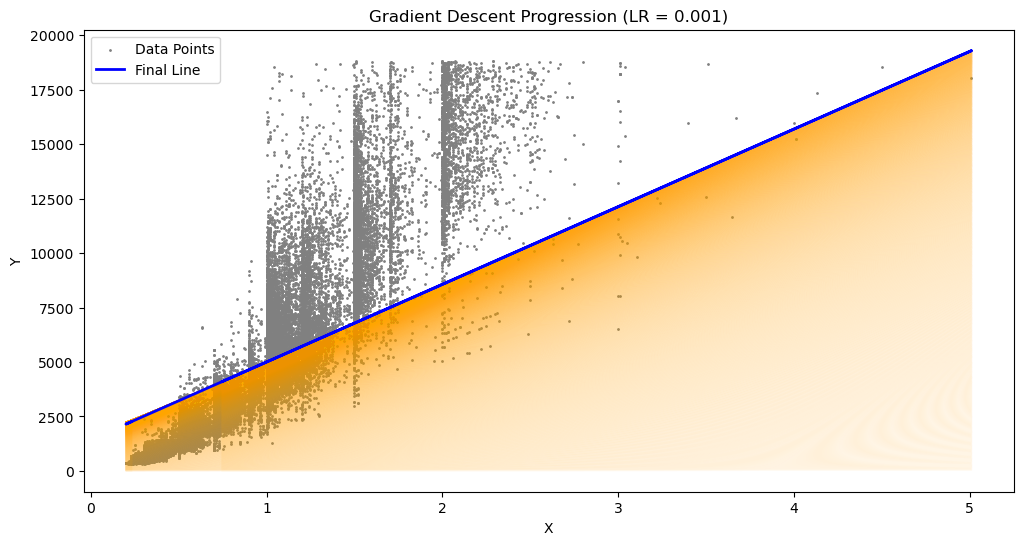

In [10]:
x = points[:, 0]
y = points[:, price_index]

learning_rate = 0.001
num_iterations = 1000

b = 0
m = 0
N = float(len(points))


plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=1, c='gray', label='Data Points')
plt.title(f'Gradient Descent Progression (LR = {learning_rate})')
plt.xlabel("X")
plt.ylabel("Y")

for i in range(num_iterations):
    m_gradient = 0
    b_gradient = 0
    for j in range(len(points)):
        m_gradient += (2/N) * x[j] * (y[j] - (m * x[j] + b))
        b_gradient += (2/N) * (y[j] - (m * x[j] + b))
    
    m += learning_rate * m_gradient
    b += learning_rate * b_gradient
    pred = m * x + b
    plt.plot(x, pred, c='orange', alpha=0.05) 


plt.plot(x, pred, c='blue', label='Final Line', linewidth=2)
plt.legend()
plt.show()

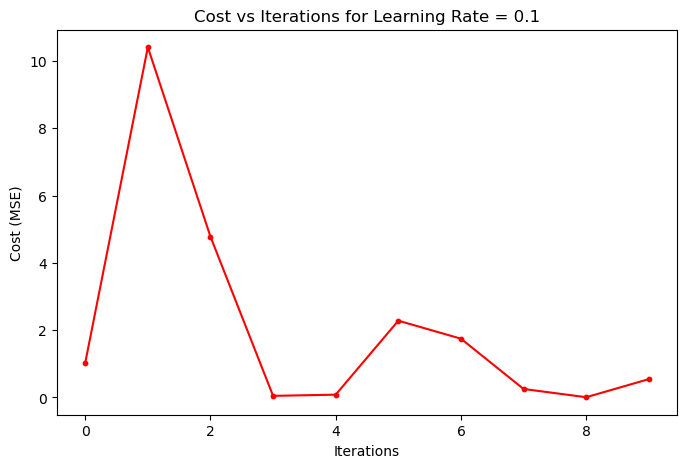

In [11]:
#stochastic gradient 

cost = []
b = 0
m = 0

# For LR = 0.1
for i in range(10):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    idx = np.random.randint(0, len(points))
    x_j,y_j = points[idx, 0], points[idx, 1]
    
    m_gradient += (2) * x_j * (y_j - (m * x_j + b))
    b_gradient += (2) * (y_j - (m * x_j + b))
    
    m = m + 0.1 * m_gradient
    b = b + 0.1 * b_gradient

    total_cost = (y_j - (m * x_j + b)) ** 2
    cost.append(total_cost)

plt.figure(figsize=(8, 5))
plt.plot(range(10), cost, 'r-', label='LR=0.1') 
plt.scatter(range(10), cost, color='r', s=10, label='Points')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations for Learning Rate = 0.1')
plt.show()



/tmp/ipykernel_13221/3307183837.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


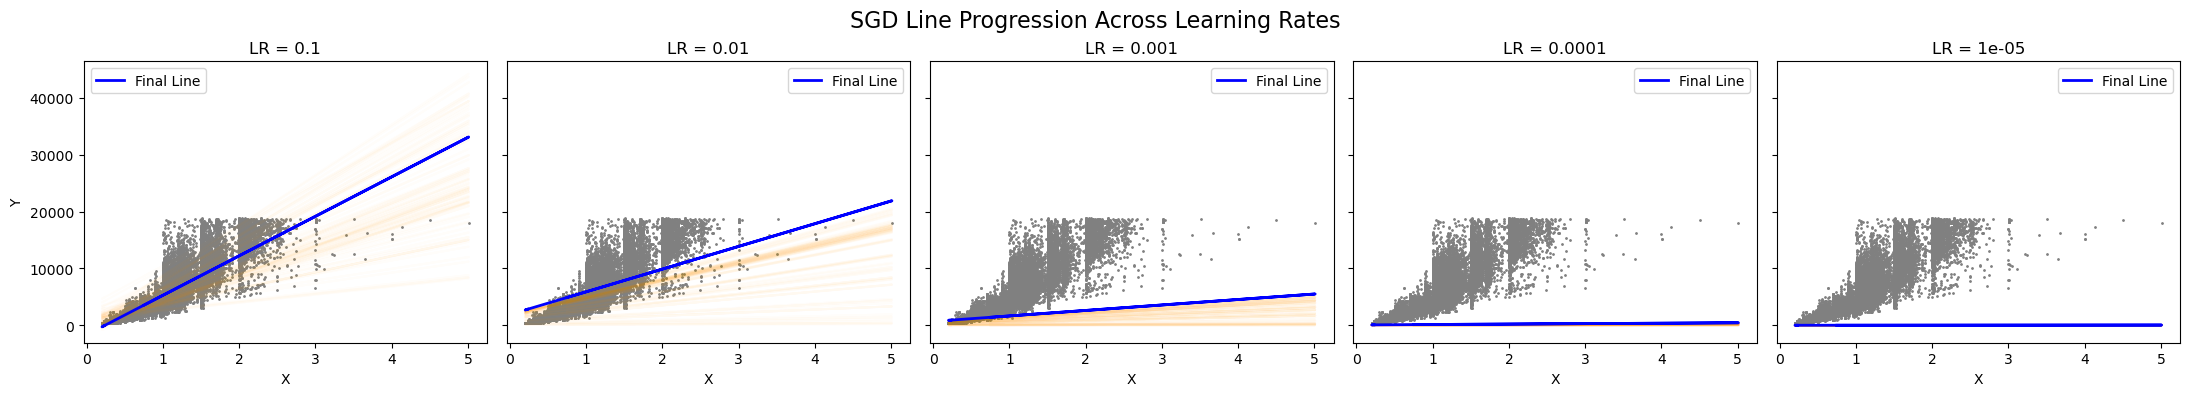

In [12]:


np.random.seed(42)

x = points[:, 0]
y = points[:, price_index]  

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
num_iterations = 100

fig, axs = plt.subplots(1, len(learning_rates), figsize=(22, 4), sharey=True)
fig.suptitle('SGD Line Progression Across Learning Rates', fontsize=16)

for i, lr in enumerate(learning_rates):
    b = 0
    m = 0
    axs[i].scatter(x, y, s=1, c='gray')
    axs[i].set_title(f"LR = {lr}")
    axs[i].set_xlabel("X")
    if i == 0:
        axs[i].set_ylabel("Y")

    for j in range(num_iterations):
        idx = np.random.randint(0, len(points))
        x_j = x[idx]
        y_j = y[idx]

        m_gradient = 2 * x_j * (y_j - (m * x_j + b))
        b_gradient = 2 * (y_j - (m * x_j + b))

        m += lr * m_gradient
        b += lr * b_gradient

        pred = m * x + b
        axs[i].plot(x, pred, color='orange', alpha=0.02)


    axs[i].plot(x, pred, color='blue', linewidth=2, label='Final Line')
    axs[i].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


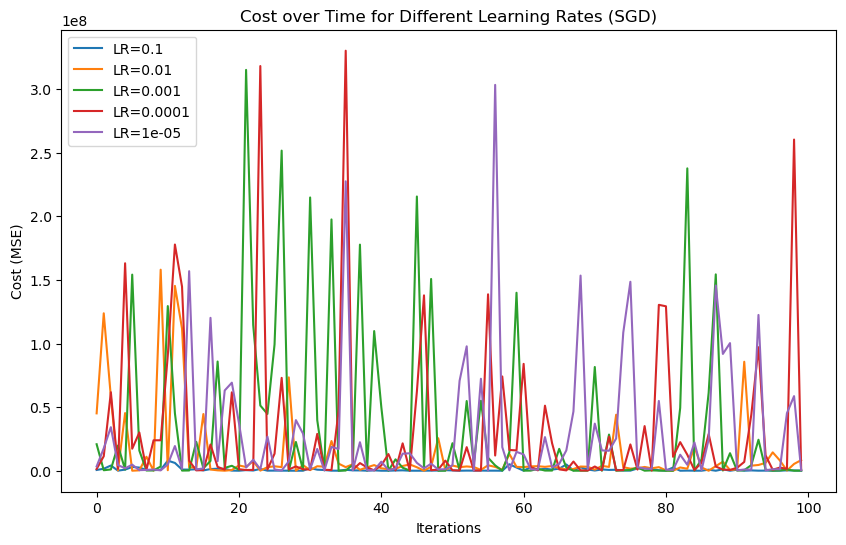

In [13]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    b = 0
    m = 0
    cost_graph = []

    for i in range(num_iterations):
        idx = np.random.randint(0, len(points))
        x_j, y_j = x[idx], y[idx]

        m_gradient = 2 * x_j * (y_j - (m * x_j + b))
        b_gradient = 2 * (y_j - (m * x_j + b))

        m = m + lr * m_gradient
        b = b + lr * b_gradient

        total_cost = (y_j - (m * x_j + b)) ** 2
        cost_graph.append(total_cost)

    plt.plot(range(num_iterations), cost_graph, label=f'LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost over Time for Different Learning Rates (SGD)')
plt.legend()
plt.show()
